# 1. COLLECT THE IMAGES

In [41]:
def screen_capture():
    import pyscreenshot as ImageGrab
    import time
    
    images_folder="New_Images/"
    
    for i in range(10):
        time.sleep(15)
        im= ImageGrab.grab(bbox=(40,170,400,550))
        print("saved. .",i)
        im.save(images_folder+str(i)+'.png')
        print("clear screen and redraw again...")

screen_capture()

saved. . 0
clear screen and redraw again...
saved. . 1
clear screen and redraw again...
saved. . 2
clear screen and redraw again...
saved. . 3
clear screen and redraw again...
saved. . 4
clear screen and redraw again...
saved. . 5
clear screen and redraw again...
saved. . 6
clear screen and redraw again...
saved. . 7
clear screen and redraw again...
saved. . 8
clear screen and redraw again...
saved. . 9
clear screen and redraw again...


# 2 Create data with label

In [42]:
import numpy as np
def create_label(image_name):
    if image_name=='0':
        return np.array([1,0,0,0,0,0,0,0,0,0])
    elif image_name=='1':
        return np.array([0,1,0,0,0,0,0,0,0,0])
    elif image_name=='2':
        return np.array([0,0,1,0,0,0,0,0,0,0])
    elif image_name=='3':
        return np.array([0,0,0,1,0,0,0,0,0,0])
    elif image_name=='4':
        return np.array([0,0,0,0,1,0,0,0,0,0])
    elif image_name=='5':
        return np.array([0,0,0,0,0,1,0,0,0,0])
    elif image_name=='6':
        return np.array([0,0,0,0,0,0,1,0,0,0])
    elif image_name=='7':
        return np.array([0,0,0,0,0,0,0,1,0,0])
    elif image_name=='8':
        return np.array([0,0,0,0,0,0,0,0,1,0])
    elif image_name=='9':
        return np.array([0,0,0,0,0,0,0,0,0,1])

In [14]:
import os
import cv2
from random import shuffle
from tqdm import tqdm

def create_data():
    data=[]
    for folder in tqdm(os.listdir("Capture Image")):
        for img in os.listdir("Capture Image/"+folder):
            path=os.path.join("Capture Image",folder,img)
            img_data=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            try:
                img_data=cv2.resize(img_data,(28,28))
            except cv2.error as e:
                continue
            data.append([np.array(img_data),create_label(folder)])
    shuffle(data)
    return data

In [43]:
data=create_data()

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:05<00:00,  1.84it/s]


# 3. Dividing data into training and testing part

In [44]:
train=data[:800]
test=data[800:]
x_train=np.array([i[0]for i in train]).reshape(-1,28,28,1)
y_train=[i[1] for i in train]
x_test=np.array([i[0] for i in test]).reshape(-1,28,28,1)
y_test=[i[1] for  i in test]

# 4.Bulid the model

In [45]:
# import warnings
# warnings.filterwarnings('ignore')
import tensorflow as tf
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

In [46]:
tf.compat.v1.reset_default_graph()
convnet = input_data(shape=[28,28,1],name='input')
convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet,5)
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet,5)
convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet,5)
# convnet = conv_2d(convnet, 64, 5, activation='relu')
# convnet = max_pool_2d(convnet,5)
convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet,5)
convnet=fully_connected(convnet,1024,activation='relu')
# convnet=dropout(convnet, 0.5)
convnet=fully_connected(convnet,10,activation='softmax')
convnet=regression(convnet , optimizer='adam',learning_rate=0.001,loss='categorical_crossentropy', name='targets')
model=tflearn.DNN(convnet,tensorboard_verbose=1)
model.fit({'input':x_train},{'targets':y_train}, n_epoch=12, 
          validation_set=({'input':x_test},{'targets':y_test}),show_metric=True)

Training Step: 155  | total loss: 0.18010 | time: 0.633s
| Adam | epoch: 012 | loss: 0.18010 - acc: 0.9823 -- iter: 768/800
Training Step: 156  | total loss: 0.16251 | time: 1.694s
| Adam | epoch: 012 | loss: 0.16251 - acc: 0.9841 | val_loss: 0.03998 - val_acc: 0.9898 -- iter: 800/800
--


# 5. Predict and Display using motplotlib


In [47]:
def crreate_data():
    data=[]
    for img in tqdm(os.listdir("new_Images")):
        path=os.path.join('new_images',img)
        img_num=img.split('.')[0]
        img_data=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        try:
            img_data=cv2.resize(img_data,(28,28))
        except cv2.error as e:
             continue
        data.append([np.array(img_data), img_num])
    shuffle(data)
    return data
        

In [48]:
test_data=crreate_data()

100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 263.84it/s]


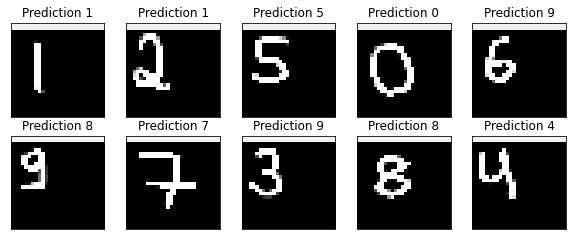

In [50]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10))
for num , data in enumerate(test_data[:10]):
    img_data=data[0]
    y=fig.add_subplot(5,5,num+1)
    orig=img_data
    data=img_data.reshape(28,28,1)
    model_out= model.predict([data])
    str_label="Prediction "+str(np.argmax(model_out))
    
    y.imshow(orig, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()  